#Analysis
---

Download data

Run:

appcfg.py download_data --url=http://binary-trading.appspot.com/remoteapi --kind="Run" --config_file=config.yaml --filename=runs.csv

#### Import dependencies
---

In [77]:
import numpy as np
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt

####Load Data
---

In [78]:
df = pd.read_csv('runs.csv')
df = df[df['currency'] != 'EURUSD']
print df.columns

Index([u'probability', u'parent_run', u'updated_at', u'currency', u'profit', u'stake_parent', u'stake', u'binary_ref', u'is_win', u'trade_aim', u'step', u'key', u'payout', u'ended_at', u'created_at', u'time_frame', u'trade_base', u'profit_parent', u'is_finished', u'balance', u'profit_net', u'stake_net'], dtype='object')


###Profitability

Win/loss ratio

1390 total runs
False    727
True     647
dtype: int64


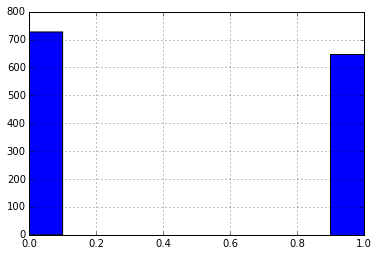

In [79]:
print '{0} total runs'.format(len(df))
print df['is_win'].value_counts()
df['is_win'].hist()

#####Actual profit
Shows the cumulative profit

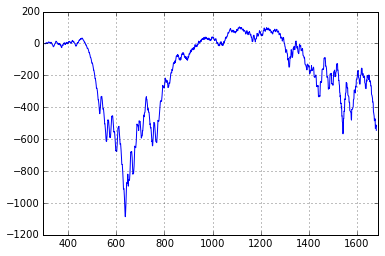

In [80]:
df['profit'].cumsum().plot()

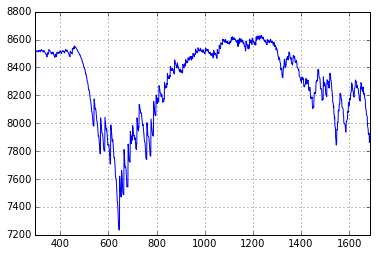

In [81]:
df['balance'].plot()

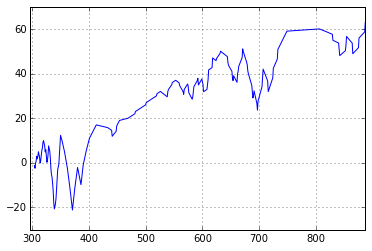

In [101]:
df_bulls = df[(df['currency'] == 'RDBULL') & (df['trade_base'] == 'directional') & (df['trade_aim'] == 'higher')]
df_bulls['profit'].cumsum().plot()

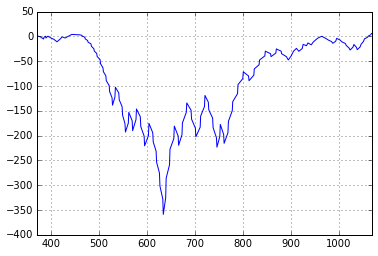

In [102]:
df_bulls = df[(df['currency'] == 'RDBULL') & (df['trade_base'] == 'directional') & (df['trade_aim'] == 'lower')]
df_bulls['profit'].cumsum().plot()

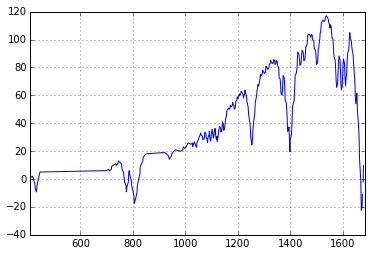

In [84]:
df_bears = df[(df['currency'] == 'RDBEAR') & (df['trade_base'] == 'directional') & (df['trade_aim'] == 'lower')]
df_bears['profit'].cumsum().plot()

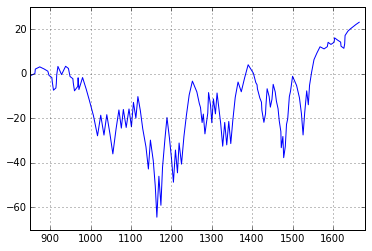

In [85]:
df_bears = df[(df['currency'] == 'RDBEAR') & (df['trade_base'] == 'directional') & (df['trade_aim'] == 'higher')]
df_bears['profit'].cumsum().plot()

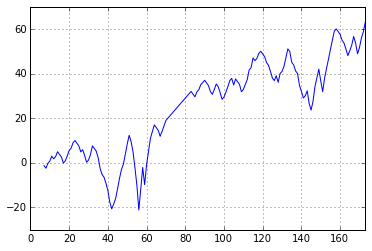

In [107]:
df_bulls = df[(df['currency'] == 'RDBULL') & (df['trade_base'] == 'directional') & (df['trade_aim'] == 'higher')]
#print df_bulls
df_bears = df[(df['currency'] == 'RDBEAR') & (df['trade_base'] == 'directional') & (df['trade_aim'] == 'lower')]
#print df_bears
df_combined = df_bulls.merge(df_bears, how='left')
df_combined['profit'].cumsum().plot()

##ROI
---

In [86]:
df['roi'] = df['profit'] / df['stake']
#print df[df['profit'] > 20]
#print df[df['roi'] < -1]
print df[['payout', 'stake', 'profit', 'roi']].tail()

      payout  stake  profit  roi
1682   19.36  10.53     NaN  NaN
1683  143.82  68.22     NaN  NaN
1684   19.28  10.49     NaN  NaN
1685   19.62  10.68     NaN  NaN
1686   83.63  39.67     NaN  NaN


####Market

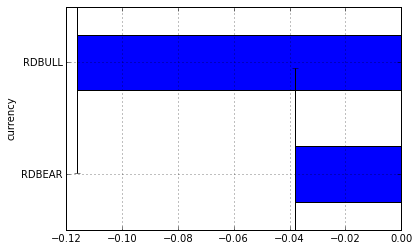

In [87]:
grouped = df.groupby('currency')
grouped['roi'].mean().plot(kind='barh', yerr=grouped['roi'].std())

####Trade Base

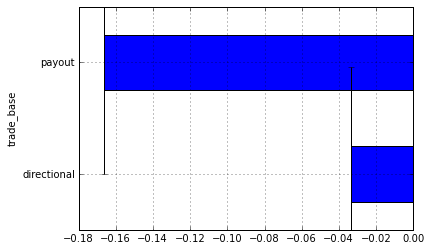

In [88]:
grouped = df.groupby('trade_base')
grouped['roi'].mean().plot(kind='barh', yerr=grouped['roi'].std())

####Trade Base & Aim
Goal:

- Want to see the ROI per selection
- Want to see the avg steps per selection (reduce risk)

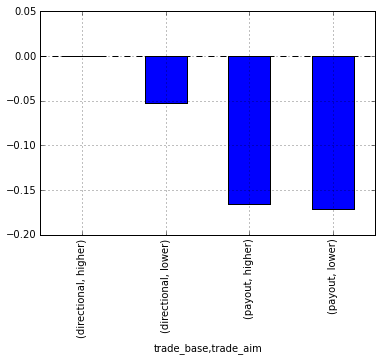

In [89]:
grouped = df.groupby(['trade_base', 'trade_aim'])
grouped['roi'].mean().plot(kind='bar')

####Trade Bae and Aim per market

The directional will matter greatly depending on the market

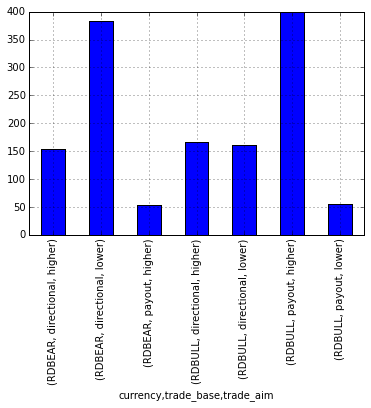

In [90]:
grouped = df.groupby(['currency', 'trade_base', 'trade_aim'])
grouped['roi'].count().plot(kind='bar')

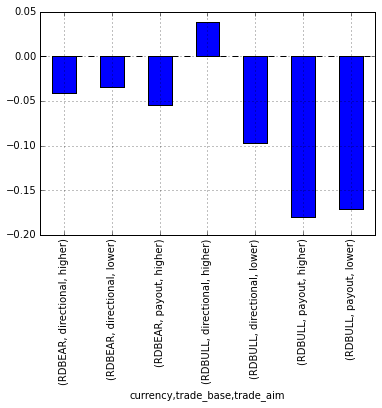

In [91]:
grouped['roi'].mean().plot(kind='bar')

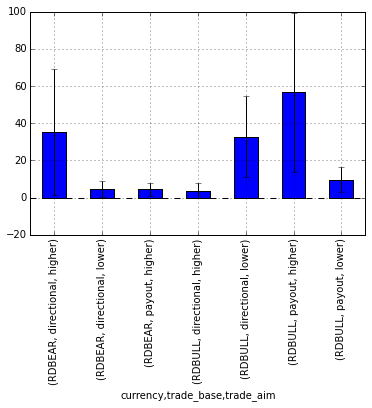

In [92]:
grouped['step'].mean().plot(kind='bar', yerr=grouped['step'].std())

##Steps
---

Goal:
- Count by step: to establish probability of ruin

1390
         2
0.00426 x - 0.9217 x + 45.79


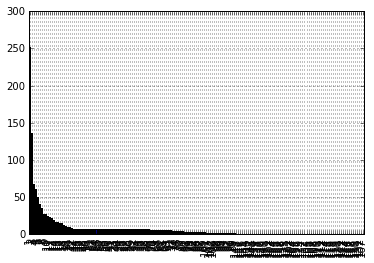

In [93]:
print len(df)
vals = df['step'].value_counts()
#print vals
#print vals.index.values
#print vals.values
coeffs = np.polyfit(vals.index.values, vals.values, 2)
poly = np.poly1d(coeffs)
print poly
vals.plot(kind='bar')
#plt.plot(vals.index.values, [0.5**(x+1) for x in vals.index.values])

Step by most profitable set ups:

174


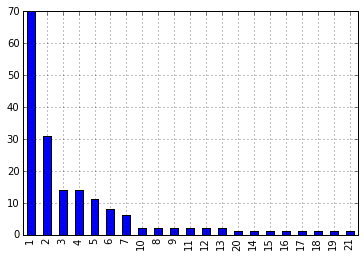

In [94]:
df_bulls = df[(df['currency'] == 'RDBULL') & (df['trade_base'] == 'directional') & (df['trade_aim'] == 'higher')]
vals = df_bulls['step'].value_counts()
print len(df_bulls)
vals.plot(kind='bar')

161


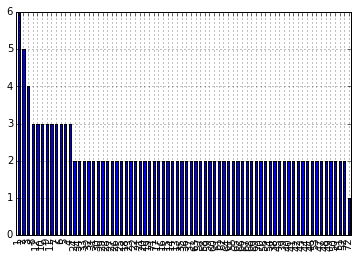

In [95]:
df_bulls = df[(df['currency'] == 'RDBULL') & (df['trade_base'] == 'directional') & (df['trade_aim'] == 'lower')]
vals = df_bulls['step'].value_counts()
print len(df_bulls)
vals.plot(kind='bar')

389


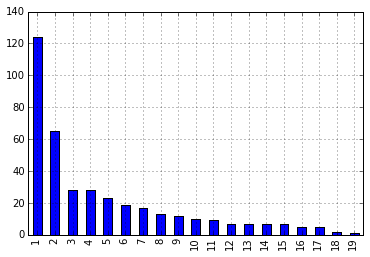

In [96]:
df_bears = df[(df['currency'] == 'RDBEAR') & (df['trade_base'] == 'directional') & (df['trade_aim'] == 'lower')]
print len(df_bears)
vals = df_bears['step'].value_counts()
vals.plot(kind='bar')

156


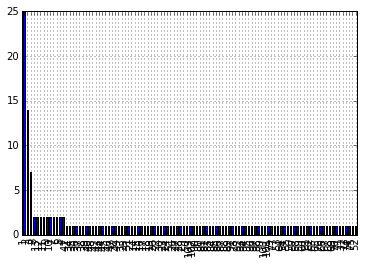

In [97]:
df_bears = df[(df['currency'] == 'RDBEAR') & (df['trade_base'] == 'directional') & (df['trade_aim'] == 'higher')]
print len(df_bears)
vals = df_bears['step'].value_counts()
vals.plot(kind='bar')

Stake by step

Goal: 
- show the volatility per step
- used in bankroll management

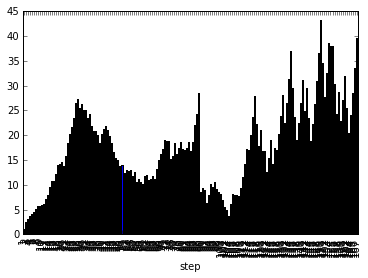

In [98]:
grouped = df.groupby(['step'])
grouped['stake'].mean().plot(kind='bar', grid=False)

Stake of total stake by step